## **Armas de Fogo e Violência: Uma Análise Multifacetada da Relação entre Posse de Armas e Homicídios no Contexto Global**

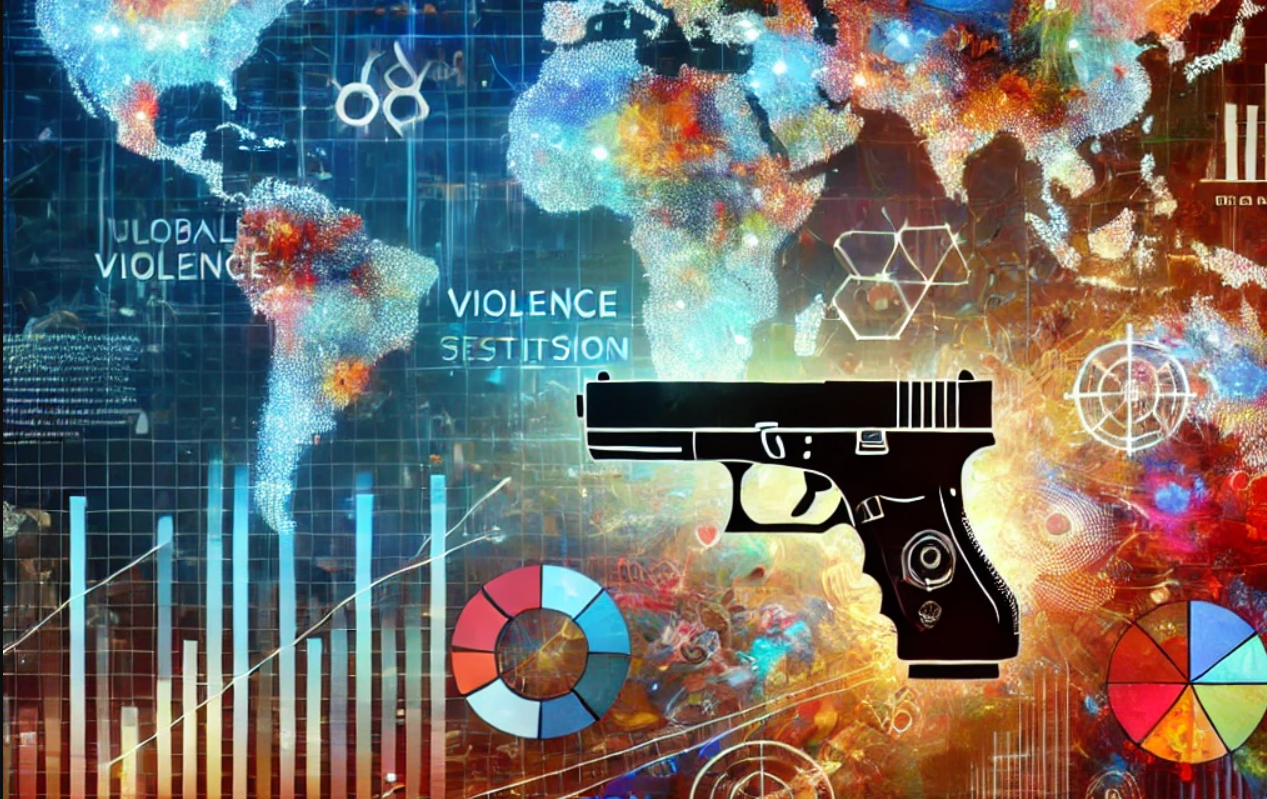

### O objetivo final do projeto é o agrupamento de países a partir de 3 características: tamanho da população, mortes (por 100k habitantes) e posse de armas (100 habitantes).

### Para tal, utilizou-se de uma modelagem de machine learning denominada clustering. A partir desse trabalho descobrimos a quantidade ideal de agrupamento para esse grupo de países, dado essas 3 características.


### Dessa forma, perceba que esse agrupamento ocorreu de maneira isenta a partir de uma modelagem de machine learning objetiva e sem viés, mas precisa e baseada em métodos estatísticos.

### **Veja um resumo dos agrupamentos e as características comuns a cada grupo:**

* #### Cluster 0: Países com taxas muito baixas de mortes violentas (variando de 0.15 a 0.63 por 100 mil), populações pequenas a médias e uma alta quantidade de armas de fogo por 100 habitantes (entre 300 e 347). Este grupo inclui países europeus e o Canadá, como Áustria, Finlândia e Chipre.

* #### Cluster 1: Países com variações moderadas nas taxas de mortes violentas (de 0.32 a 3.79 por 100 mil), populações médias e uma menor quantidade de armas de fogo civis (entre 21 e 125 por 100 habitantes). Países como Afeganistão, Albânia e Argentina pertencem a este cluster.

* #### Cluster 2: China e Índia se destacam aqui, representando países altamente populosos (mais de 1 bilhão de habitantes), com baixas taxas de mortes violentas (0.02 e 0.57 por 100 mil) e também uma quantidade muito baixa de armas de fogo civis (36 e 53 por 100 habitantes).

* #### Cluster 3: Países com taxas altas de mortes violentas (entre 6.29 e 11.84 por 100 mil), populações pequenas a médias e variação moderada no número de armas de fogo civis (26 a 196 por 100 habitantes). Inclui países da América Latina e Caribe, como Costa Rica e Haiti, além do Iraque.

* #### Cluster 4: Países com as maiores taxas de mortes violentas (variando de 20.15 a 36.78 por 100 mil), populações entre médias e grandes, e uma quantidade moderada de armas de fogo civis (83 a 141 por 100 habitantes). Este cluster inclui países latino-americanos como Brasil, Colômbia e El Salvador.

* #### Cluster 5: Os Estados Unidos aparecem isolados neste cluster, com uma taxa relativamente alta de mortes violentas (3.96 por 100 mil), uma população muito grande, e uma quantidade extraordinariamente alta de armas de fogo civis (1205 por 100 habitantes).

#### Note que o Brasil se encontra no grupo 4, junto com  Colômbia, El Salvador, Guatemala, Honduras e Vezenuela. Isso é mais que um sinal de que a coisa está muito ruim.



---



### Vamos ao trabalho:

#### Carrego algumas bibliotecas que vou utilizar sempre

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import gspread as gs

In [72]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [74]:
import plotly.express as px
import plotly.graph_objects as go

#### Vou carregar a base de dados extraída do ranking Global Peace Index (GPI):

In [75]:
url = "https://docs.google.com/spreadsheets/d/1N2WuobFrBv-S-ybZ54w3Jky3amdosK2dpBJnbd74AN4/export?format=csv"
dados_perigo = pd.read_csv(url)

In [76]:
dados_perigo.head()

,country,gpi2023,gpi2022,gpi2021
0,Afghanistan,"34,48","35,54","36,31"
1,Albania,"17,45","17,61","18,24"
2,Algeria,"20,94","21,46","23,1"
3,Angola,"20,2","19,82","20,17"
4,Argentina,"18,37","19,11","19,45"


In [77]:
#vou colocar ponto onde há vírgula no dados_perigo
dados_perigo = dados_perigo.replace(',','.', regex=True)

In [78]:
dados_perigo.head()

,country,gpi2023,gpi2022,gpi2021
0,Afghanistan,34.48,35.54,36.31
1,Albania,17.45,17.61,18.24
2,Algeria,20.94,21.46,23.1
3,Angola,20.2,19.82,20.17
4,Argentina,18.37,19.11,19.45


## Vou carregar os dados acerca da quantidade de armas por cidadão:

In [79]:
url1 = "https://docs.google.com/spreadsheets/d/16FRJ0IlLevIvBnaLV9fY8nZYZO-bR2On-yix7wC5nb8/export?format=csv"
posse_armas = pd.read_csv(url1)

In [80]:
posse_armas.head()

,country,armas civis,armas_per_100
0,Afghanistan,4270000,125.0
1,Albania,350000,120.0
2,Algeria,877000,21.0
3,American Samoa,400,7.0
4,Andorra,10000,141.0


### Dados acerca das mortes totais e violentas por país

In [81]:
url3 = "https://docs.google.com/spreadsheets/d/1y_jvjhj-Ca92oUzlAPZV1FoCjYN6F11ch6ILaN4mSzw/export?format=csv"
mortes_armas= pd.read_csv(url3)

In [82]:
mortes_armas.head()

,country,mortes totais,violent mortes,mortes violentas a cada 100k pessoas
0,Afghanistan,621.0,434.0,"1,13"
1,Albania,70.0,40.0,"1,47"
2,Algeria,254.0,135.0,"0,32"
3,American Samoa,NaN,NaN,"0,42"
4,Andorra,1.0,NaN,"0,09"


In [83]:
#vou trocar vírgula por ponto
mortes_armas = mortes_armas.replace(',','.', regex=True)

In [84]:
url3 = "https://docs.google.com/spreadsheets/d/1WIW5VzrnrVZlYnvPRGKwr0mv349jTJ7MGCS6VE6FbHo/export?format=csv"
dados_pop = pd.read_csv(url3)

In [85]:
dados_pop.head()

,country,pop
0,China,1.409.670.000
1,India,1.404.910.000
2,United States,335.893.238
3,Indonesia,281.603.800
4,Pakistan,241.499.431


In [86]:
# Remove pontos e vírgulas e converte para inteiro
dados_pop['pop'] = dados_pop['pop'].str.replace(r'[.,]', '', regex=True).astype(int)

In [87]:
dados_pop.head()

,country,pop
0,China,1409670000
1,India,1404910000
2,United States,335893238
3,Indonesia,281603800
4,Pakistan,241499431


## Juntar as colunas de dados que me interessam em um dataframe só

In [88]:
#vou juntar os dataframes mortes_armas, posse_armas e dados_perigo a partir da coluna country utilizando merged
df = pd.merge(mortes_armas, dados_perigo, on='country')
df = pd.merge(df, dados_pop, on='country')
df = pd.merge(df, posse_armas, on='country')

In [89]:
df.head()

,country,mortes totais,violent mortes,mortes violentas a cada 100k pessoas,gpi2023,gpi2022,gpi2021,pop,armas civis,armas_per_100
0,Afghanistan,621.0,434.0,1.13,34.48,35.54,36.31,34262840,4270000,125.0
1,Albania,70.0,40.0,1.47,17.45,17.61,18.24,2761785,350000,120.0
2,Algeria,254.0,135.0,0.32,20.94,21.46,23.1,46700000,877000,21.0
3,Angola,417.0,161.0,0.53,20.2,19.82,20.17,35121734,2982000,112.0
4,Argentina,3309.0,1709.0,3.79,18.37,19.11,19.45,47067441,3256000,74.0


## Organizar os dados

In [90]:
# Renomear colunas para torná-las mais consistentes
df.columns = ['country', 'total_deaths', 'violent_deaths', 'violent_deaths_per_100k', 'gpi_2023', 'gpi_2022', 'gpi_2021', 'pop', 'civilian_firearms', 'civilian_firearms_per_100']

In [ ]:
# Tratar valores ausentes
# Preencher valores ausentes com 0 para colunas numéricas
df['total_deaths'].fillna(0, inplace=True)
df['violent_deaths'].fillna(0, inplace=True)
df['violent_deaths_per_100k'].fillna(0, inplace=True)
df['civilian_firearms'].fillna(0, inplace=True)
df['civilian_firearms_per_100'].fillna(0, inplace=True)
df['pop'].fillna(0, inplace=True)
df['gpi_2023'].fillna(0, inplace=True)
df['gpi_2022'].fillna(0, inplace=True)
df['gpi_2021'].fillna(0, inplace=True)

In [92]:
# Verificar e converter tipos de dados
df['total_deaths'] = df['total_deaths'].astype(float)
df['violent_deaths'] = df['violent_deaths'].astype(float)
df['violent_deaths_per_100k'] = df['violent_deaths_per_100k'].astype(float)
df['civilian_firearms'] = df['civilian_firearms'].astype(int)
df['civilian_firearms_per_100'] = df['civilian_firearms_per_100'].astype(float)
df['pop'] = df['pop'].astype(float)

## Veja um trecho de como ficou o dataframe organizado

In [93]:
df.head()

,country,total_deaths,violent_deaths,violent_deaths_per_100k,gpi_2023,gpi_2022,gpi_2021,pop,civilian_firearms,civilian_firearms_per_100
0,Afghanistan,621.0,434.0,1.13,34.48,35.54,36.31,34262840.0,4270000,125.0
1,Albania,70.0,40.0,1.47,17.45,17.61,18.24,2761785.0,350000,120.0
2,Algeria,254.0,135.0,0.32,20.94,21.46,23.1,46700000.0,877000,21.0
3,Angola,417.0,161.0,0.53,20.2,19.82,20.17,35121734.0,2982000,112.0
4,Argentina,3309.0,1709.0,3.79,18.37,19.11,19.45,47067441.0,3256000,74.0


## Vou criar um mapa para visualizar a distribuição de mortes violentas por 100 habitantes por país.

In [96]:
# Criar o mapa:
fig_map0 = px.choropleth(df,
                    locations="country",
                    locationmode="country names",
                    color="violent_deaths_per_100k",
                    color_continuous_scale=['plum', "mediumpurple", "navy"],
                    range_color=(0, 25),
                    title='Mortes Violentas por 100 mil Habitantes por País',
                    labels={'violent_deaths_per_100k': 'Mortes Violentas por 100 mil Habitantes'},
                    )

# Ajustar o layout
fig_map0.update_layout(
    title_text='',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

# Mostrar o gráfico
fig_map0.show()

In [97]:
# Criar o heatmap
fig_map1 = px.choropleth(df,
                    locations="country",
                    locationmode="country names",
                    color="civilian_firearms_per_100",
                    color_continuous_scale= ['lightsalmon', 'red', 'firebrick'],
                    range_color=(0, 1200),
                    title='Armas nas mãos de civis por 100 mil habitantes por país')

# Ajustar o layout
fig_map1.update_layout(
    title_text='',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

# Mostrar o gráfico
fig_map1.show()

### Veja um pairplot para visualizar as possíveis correlações existentes entre as variáveis

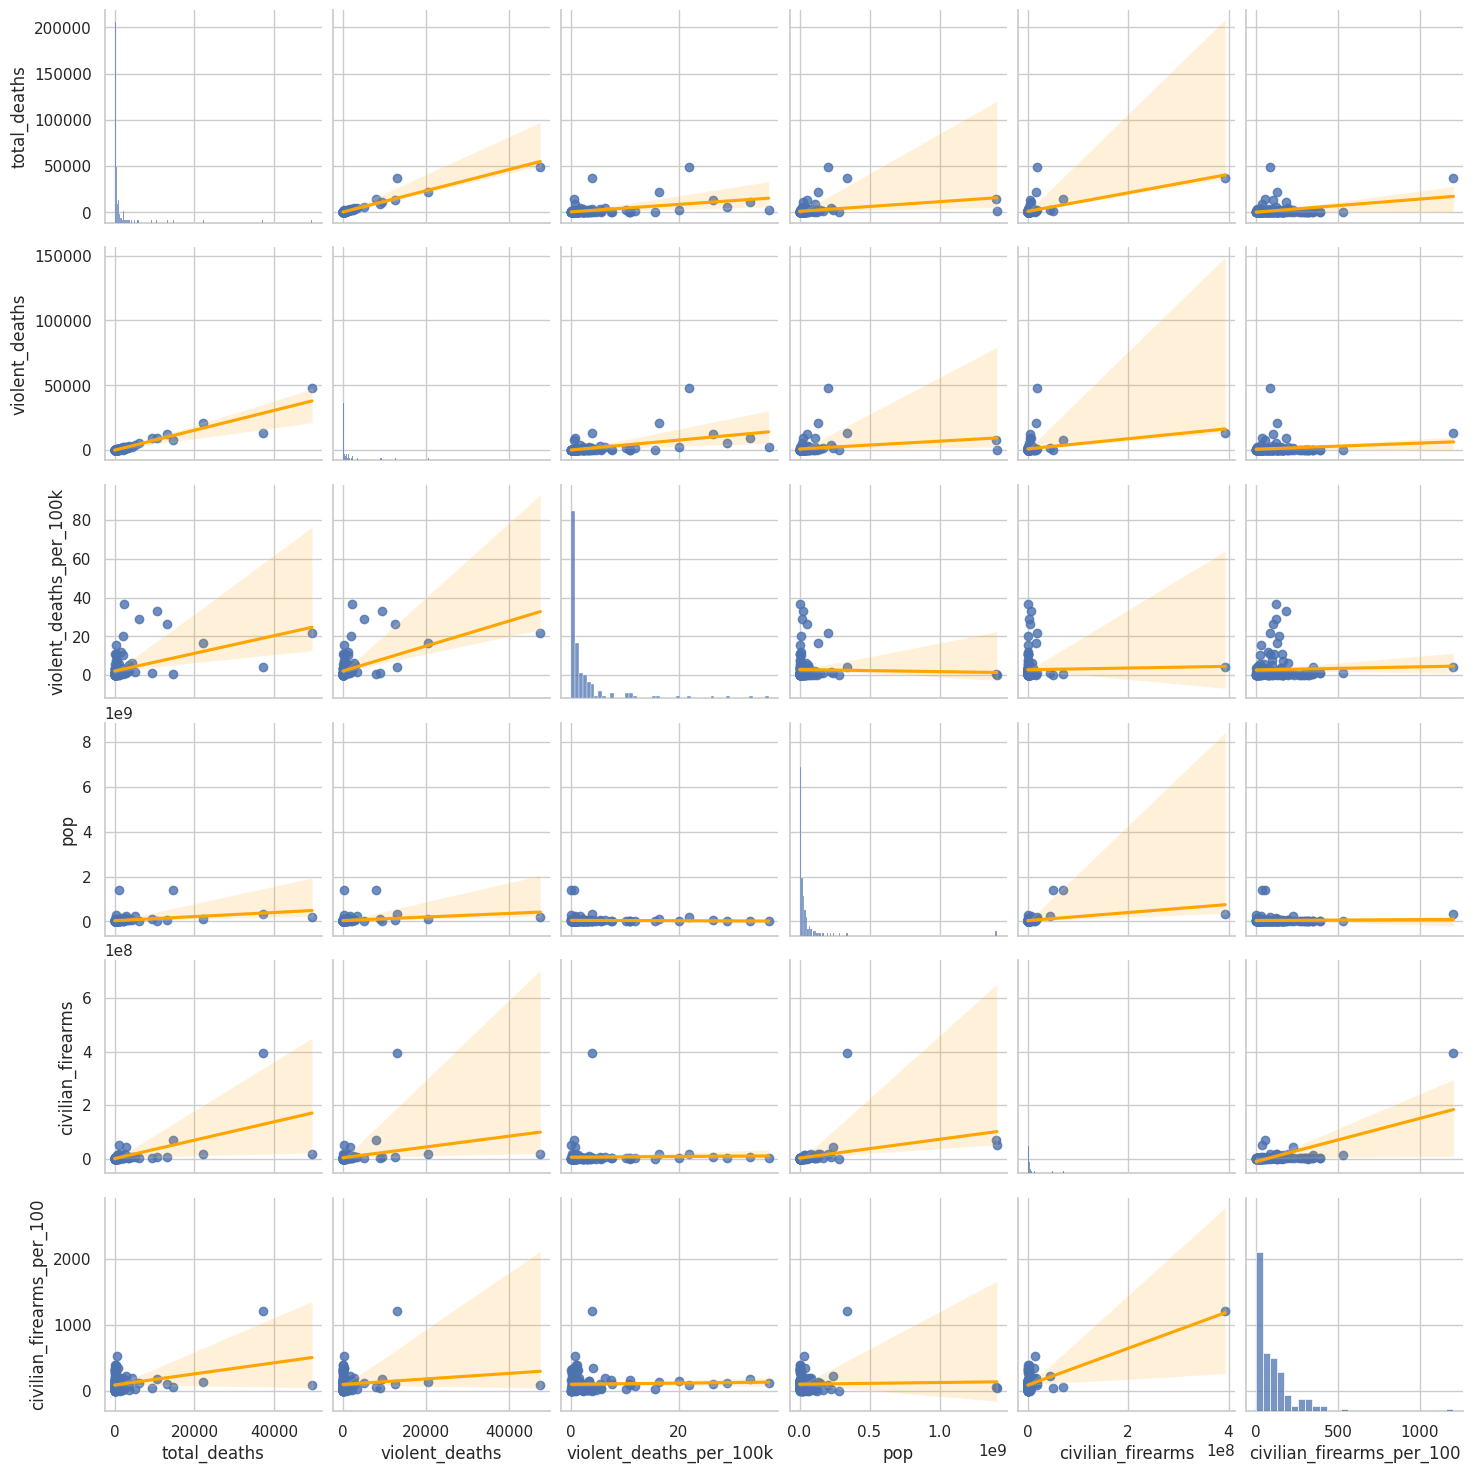

In [99]:
#vou criar um pairplot com uma linh de cor laranja para ver a relação entre as variáveis
sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'orange'}})
plt.show()

### Veja que não há nada muito evidente olhando de primeira. Nenhuma relação positiva e nem negativa muito clara constante e óbvia.

## Estudo da correlação


---



### Correlação entre as diferentes colunas de dados do dataframe:

In [101]:
# Filtrar apenas as colunas numéricas
numeric_df = df.select_dtypes(include='number')

# vejamos a correlação entre as colunas
correlation_matrix = numeric_df.corr()

### Vou ver isso em um gráfico heatmap da correlação:

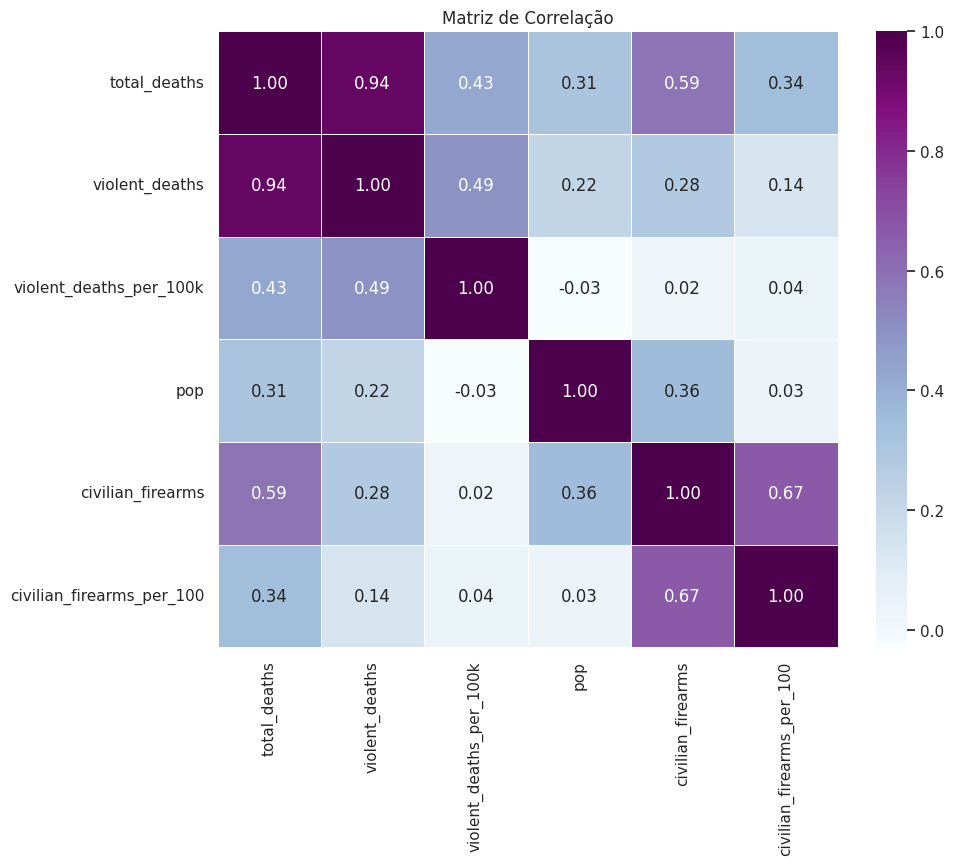

In [102]:
# Configurar o tamanho da figura
plt.figure(figsize=(10, 8))

# Criar o heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt='.2f', linewidths=0.5)

# Configurar título e rótulos
plt.title('Matriz de Correlação')
plt.show()

### A matriz de correlação mostra a relação entre diferentes variáveis numéricas. Os valores variam de -1 a 1, onde valores próximos de 1 indicam uma correlação positiva forte, valores próximos de -1 indicam uma correlação negativa forte, e valores próximos de 0 indicam pouca ou nenhuma correlação.

#### -  total_deaths e violent_deaths: Essa é a correlação mais óbvia. Têm uma correlação muito alta (0,94), sugerindo que onde há mais mortes totais, há também mais mortes violentas.

#### -   total_deaths e civilian_firearms: têm uma correlação positiva moderada (0,59), indicando que, à medida que o número de armas de fogo civis aumenta, o número total de mortes também tende a aumentar.

#### -  violent_deaths_per_100k e civilian_firearms têm uma correlação quase nula (0,02), sugerindo que a posse de armas de fogo por civis não está fortemente relacionada com as mortes violentas por 100 mil habitantes.

#### Esses valores ajudam a identificar quais variáveis têm relações mais fortes entre si.

### Vou estudar a correlação individualmente agora

## Visualizando os dados individualmente:

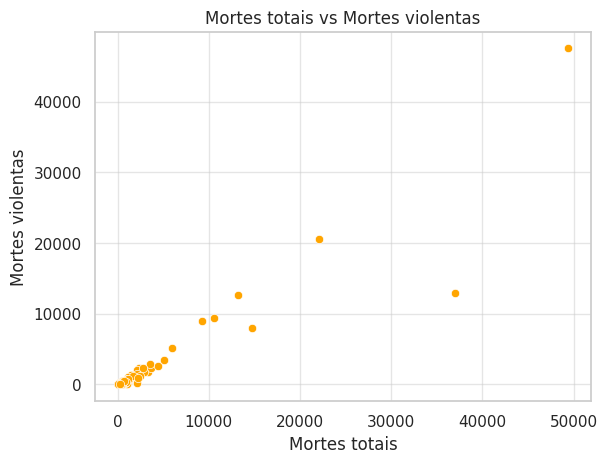

In [103]:
#quero visualizar a dispersão de mortes
sns.scatterplot(x='total_deaths', y='violent_deaths', data = df, color = 'orange')
plt.title('Mortes totais vs Mortes violentas')
plt.xlabel('Mortes totais')
plt.ylabel('Mortes violentas')
plt.grid(True, alpha = 0.5)
plt.show()

### Veja a tendência de subida das mortes violentas conforme o total de mortes se eleva. Essa é uma relação óbvia.

### Veja esse outro gráfico que interessante:

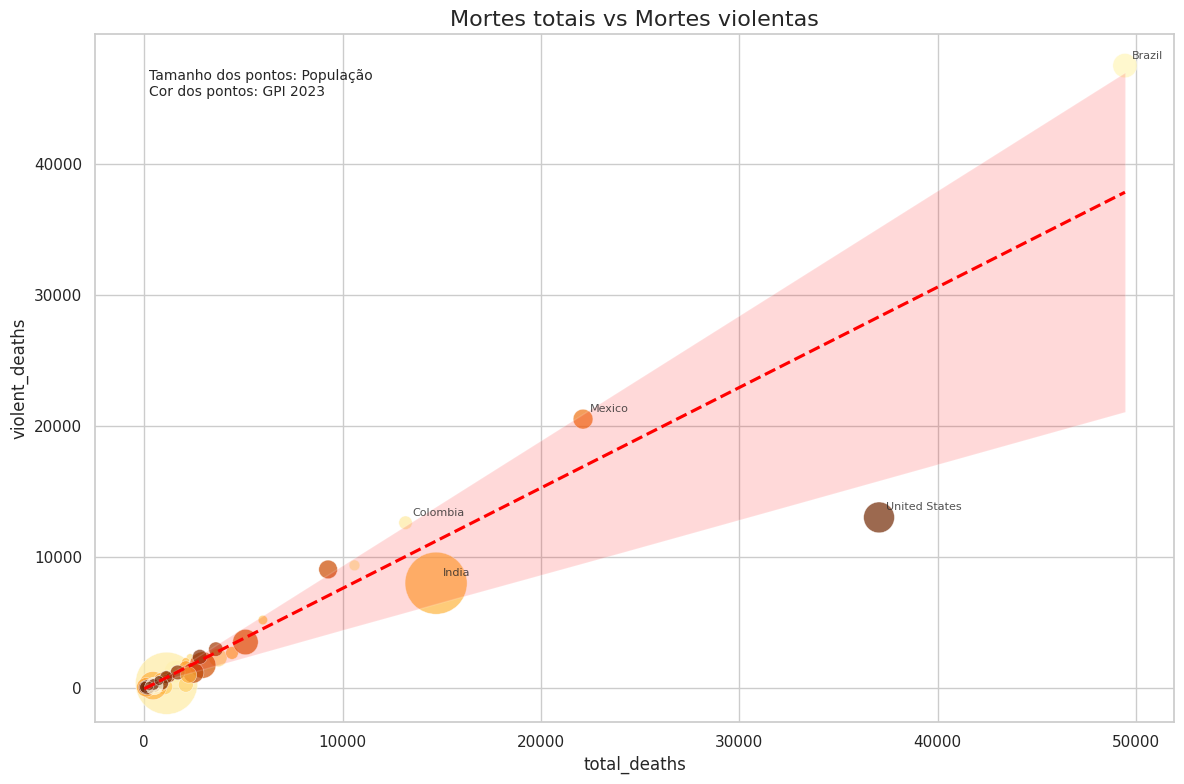

In [104]:
# Configurar o estilo do Seaborn
sns.set_style("whitegrid")

# Criar o gráfico de dispersão
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df,
    x='total_deaths',
    y='violent_deaths',
    size='pop',  # Tamanho dos pontos baseado na população
    sizes=(20, 2000),  # Range de tamanhos dos pontos
    hue='gpi_2023',  # Cor baseada no GPI 2023
    palette='YlOrBr',  # Paleta de cores
    alpha=0.7,  # Transparência dos pontos
    legend=False  # Remove a legenda
)

# Adicionar rótulos e título
plt.title('Mortes totais vs Mortes violentas', fontsize=16)
plt.xlabel('Mortes totais', fontsize=12)
plt.ylabel('Mortes violentas', fontsize=12)

# Adicionar uma linha de regressão
sns.regplot(
    data=df,
    x='total_deaths',
    y='violent_deaths',
    scatter=False,
    color='red',
    line_kws={'linestyle': '--'}
)

# Adicionar rótulos para alguns países (por exemplo, os 5 com mais mortes totais)
top_5 = df.nlargest(5, 'total_deaths')
for idx, row in top_5.iterrows():
    plt.annotate(
        row['country'],
        (row['total_deaths'], row['violent_deaths']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8,
        alpha=0.8
    )

# Adicionar uma nota explicativa
plt.text(0.05, 0.95, 'Tamanho dos pontos: População\nCor dos pontos: GPI 2023',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### Maior o círculo, maior é a população no país. As cores, por sua vez, indicam a pontuação no ranking de paz (GPI) de 2023 por país. Veja como o caso do Brasil é muito assustador. A população é grande e tudo, mas o número de mortes e de mortes violentas é muito muito elevado. Veja a China, que aquela grande bolha amarela lá embaixo e note a diferença de mortes anuais, mesmo com uma população muito maior.
### É incrível o mau desempenho do Brasil e como ele consegue ser um exemplo legítimo do que não fazer na parte de segurança.

### Visualizar a dispersão de mortes a cada 100 mil habitantes

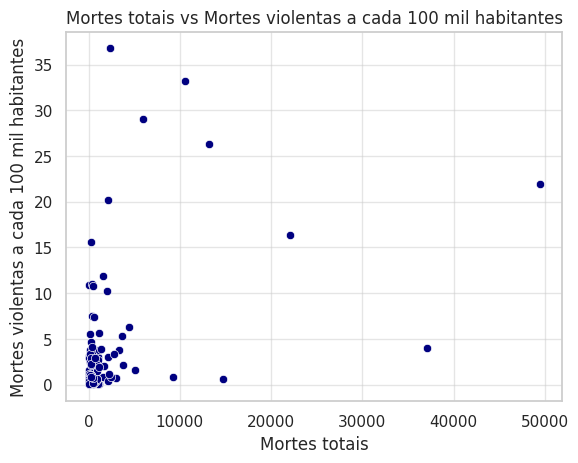

In [105]:
#quero visualizar a dispersão de mortes a cada 100 mil habitantes
sns.scatterplot(x='total_deaths', y='violent_deaths_per_100k', data=df, color = 'navy')
plt.title('Mortes totais vs Mortes violentas a cada 100 mil habitantes')
plt.xlabel('Mortes totais')
plt.ylabel('Mortes violentas a cada 100 mil habitantes')
plt.grid(True, alpha = 0.5)
plt.show()

### Finalmente um mais interessante: Mortes vs Armas por habitante (nas mãos de civis)

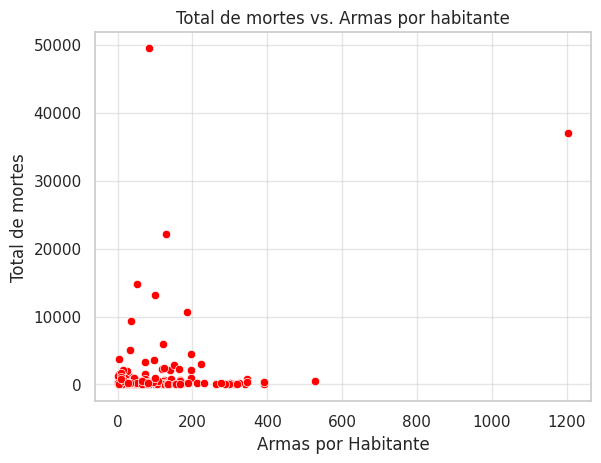

In [106]:
#quero visualizar o total de mortes vs. armas por habitante
sns.scatterplot(x='civilian_firearms_per_100', y='total_deaths', data=df, color = 'red')
plt.title('Total de mortes vs. Armas por habitante')
plt.xlabel('Armas por Habitante')
plt.ylabel('Total de mortes')
plt.grid(True, alpha = 0.5)
plt.show()

## Existe um país em que as armas por habitante é baixa (está abaixo da média mundial), mas o total de mortes é o maior da amostra. Adivinhe que país é esse?

## Vamos ver qual é:

In [51]:
#vou escrever o país com mais mortes totais
df.loc[df['total_deaths'].idxmax()]

,18
country,Brazil
total_deaths,49437.0
violent_deaths,47510.0
violent_deaths_per_100k,21.93
gpi_2023,24.62
gpi_2022,24.65
gpi_2021,24.3
pop,203080756.0
civilian_firearms,17510000
civilian_firearms_per_100,83.0


### Sempre ele: Brasil!

## Rápida comparação: Brasil vs EUA

In [107]:
#vou escrever as armas dividido por habitantes do Brasil
df.loc[df['country'] == 'Brazil']

,country,total_deaths,violent_deaths,violent_deaths_per_100k,gpi_2023,gpi_2022,gpi_2021,pop,civilian_firearms,civilian_firearms_per_100
18,Brazil,49437.0,47510.0,21.93,24.62,24.65,24.3,203080756.0,17510000,83.0


### Vamos comparar isso com os EUA que têm uma quantidade de armas nas mãos de civis enorme:

In [108]:
#vou escrever os dados dos eua
df.loc[df['country'] == 'United States']

,country,total_deaths,violent_deaths,violent_deaths_per_100k,gpi_2023,gpi_2022,gpi_2021,pop,civilian_firearms,civilian_firearms_per_100
151,United States,37040.0,13001.0,3.96,24.48,24.4,23.37,335893238.0,393347000,1205.0


### Veja uma rápida comparação entre esses dois países:




### Diferença percentual de armas de fogo nas mãos de civis (por habitante) entre EUA e Brasil

In [109]:
# Filtrar o número de armas por habitante para os dois países
us_firearms = df.loc[df['country'] == 'United States', 'civilian_firearms'].values[0]
brazil_firearms = df.loc[df['country'] == 'Brazil', 'civilian_firearms'].values[0]

# Calcular a diferença percentual
percentual_diff = ((us_firearms - brazil_firearms) /us_firearms) * 100

# Exibir o resultado
print(f"A diferença percentual de armas por habitante entre os Estados Unidos e o Brasil é de {percentual_diff:.2f}%.")


A diferença percentual de armas por habitante entre os Estados Unidos e o Brasil é de 95.55%.


### Ou seja, o total de armas nas mãos de civis (por habitante) é 95% menor

### Diferença percentual do total de mortos entre EUA e Brasil:




In [110]:
#filtrar o número de mortes dos dois países
us_deaths = df.loc[df['country'] == 'United States', 'total_deaths'].values[0]
brazil_deaths = df.loc[df['country'] == 'Brazil', 'total_deaths'].values[0]

#calcular a diferença percentual
percentual_diff = ((us_deaths - brazil_deaths) / us_deaths) * 100
print(f"A diferença percentual de mortes entre os Estados Unidos e o Brasil é de {percentual_diff:.2f}%.")

A diferença percentual de mortes entre os Estados Unidos e o Brasil é de -33.47%.


### O total de mortes no EUA é 33% menor, mesmo com eles tendo uma população de 100 mi a mais.

### Diferença percentual do total de mortes violentas (por 100 mil habitantes) entre EUA e Brasil:

In [111]:
#calcula a diferença percentual de mortes por 100k habitantes
us_deaths_100k = df.loc[df['country'] == 'United States', 'violent_deaths_per_100k'].values[0]
brazil_deaths_100k = df.loc[df['country'] == 'Brazil', 'violent_deaths_per_100k'].values[0]

#calcular a diferença percentual
percentual_diff = ((us_deaths_100k - brazil_deaths_100k) / us_deaths_100k) * 100
print(f"A diferença percentual de mortes por 100k habitantes entre os Estados Unidos e o Brasil é de {percentual_diff:.2f}%.")

A diferença percentual de mortes por 100k habitantes entre os Estados Unidos e o Brasil é de -453.79%.


### Esse dado é ainda mais assustador. As mortes a cada 100 mil habitantes são 453% (quase 5 vezes) maior no Brasil em relação aos EUA.

### Ou seja, há muito mais armas nas mãos da população estadunidense e mesmo assim as mortes violentas são muito menores.


### Ou seja, não necessariamente uma coisa está relacionada a outra. Existem diversos outros fatores por trás disso.

### **Conclusão temporária:**
---


#### Não é possível afirmar que mais armas gerarão mais mortes em um país, com base em dados. Porém, observa-se que existe sim uma correlação positiva moderada entre as duas variáveis indicando que maior acesso a armas implica aumento de mortes totais em um país (e consequentemente de mortes violentas). No caso do Brasil, que a violência é inacreditável, certamente ocorreria um aumento das mortes, caso a quantidade de armas po civis aumentasse.

#### Essa é a tese inicial aqui.

## Modelagem de Machine Learning: Clusterização utilizando o modelo Knn

## **Explicando o que será feito:**
### Esse modelo é ótimo para perceber semelhança entre variáveis. A ideia aqui é que a partir desse treino o modelo knn perceba as semelhanças entre os diferentes países dessa amostra e então os dividiremos em grupos a partir disso com base na população, nas mortes violentas e com base também na questão de armas de fogo na mão de civis.

### Vou montar vários agrupamentos de países a partir de algumas características semelhantes entre eles. Vou agrupar por População, Mortes a cada 100 mil habitantes e Armas de fogo em posse de civis (por habitante).

### Outras bibliotecas que vou utilizar agora:

In [112]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt

### Pré-processamento de dados:

In [113]:
# Preparar os dados
features = ['pop', 'violent_deaths_per_100k', 'civilian_firearms_per_100']
X = df[features].values

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Encontrar o número ideal de clusters com base nessas características:

In [114]:
# Encontrar o número ideal de clusters
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)

    return distances.index(max(distances)) + 2

optimal_k = optimal_number_of_clusters(wcss)
print(f"Número ideal de clusters: {optimal_k}")

Número ideal de clusters: 6


### Teremos, portanto, 6 grupos de países!

### Treinar o modelo para finalmente agrupar:

In [115]:
# Treinar o modelo KMeans com o número ideal de clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Adicionar as labels de cluster ao DataFrame original
df['Cluster'] = cluster_labels

### Treinamos!

### Visualizar isso em 3d:

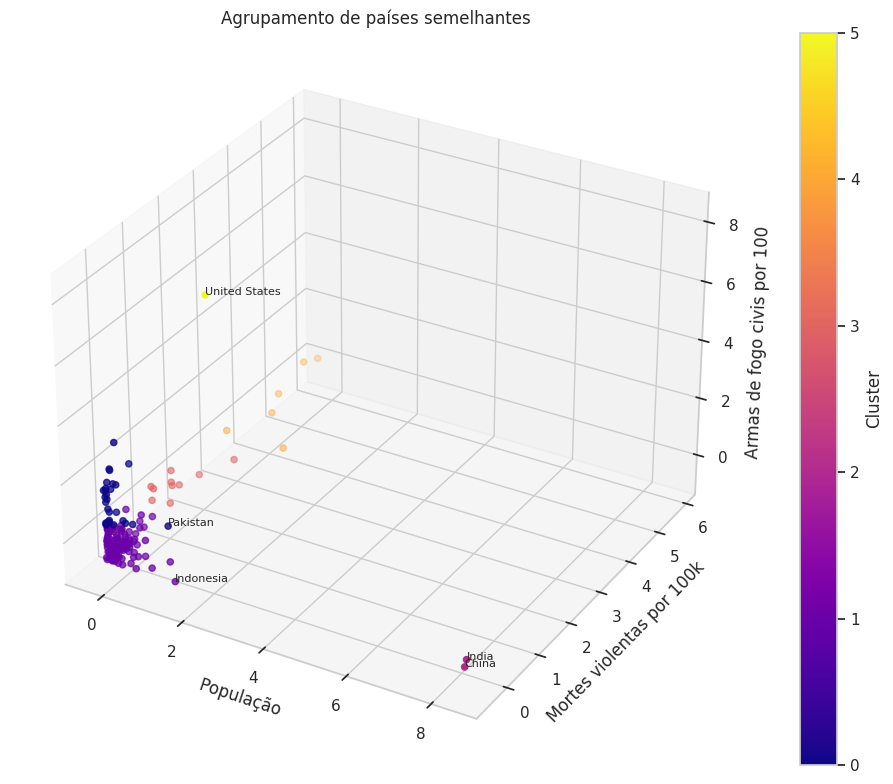

In [120]:
# Visualizar os resultados em um gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
                     c=cluster_labels, cmap='plasma')

ax.set_xlabel('População ')
ax.set_ylabel('Mortes violentas por 100k ')
ax.set_zlabel('Armas de fogo civis por 100 ')
ax.set_title(f'Agrupamento de países semelhantes')

plt.colorbar(scatter, label='Cluster')

# Adicionar rótulos para alguns países (por exemplo, os 5 com maior população)
top_5 = df.nlargest(5, 'pop')
for idx, row in top_5.iterrows():
    ax.text(X_scaled[idx, 0], X_scaled[idx, 1], X_scaled[idx, 2], row['country'], fontsize=8)

plt.tight_layout()
plt.show()

### O gráfico abaixo será interativo. Sim, você vai pode mexer nele de um lado para o outro.

In [131]:
# Criar o gráfico 3D
fig = go.Figure()

# Adicionar o gráfico de dispersão 3D com cores baseadas nos clusters
fig.add_trace(go.Scatter3d(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    z=X_scaled[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=cluster_labels,  # Cores baseadas nos clusters
        colorscale='Plasma',  # Escolhe o cmap 'plasma'
        colorbar=dict(title='Cluster')
    ),
    text=df['country'],  # Adicionar os nomes dos países como texto ao passar o mouse
))

# Configurar os eixos e o título
fig.update_layout(
    scene=dict(
        xaxis_title='População',
        yaxis_title='Mortes violentas por 100k',
        zaxis_title='Armas de fogo civis por 100',
    ),
    title='Agrupamento de países semelhantes',
    width=1000,
    height=800
)

# Adicionar rótulos para os 5 países com maior população
top_5 = df.nlargest(5, 'pop')
for idx, row in top_5.iterrows():
    fig.add_trace(go.Scatter3d(
        x=[X_scaled[idx, 0]],
        y=[X_scaled[idx, 1]],
        z=[X_scaled[idx, 2]],
        mode='text',
        text=[row['country']],
        textposition='top right',
        showlegend=False
    ))

# Mostrar o gráfico interativo
fig.show()


### Vejamos com mais detalhes cada cluster:

In [121]:
# Criar um DataFrame para cada cluster
cluster_dfs = {}
for i in range(optimal_k):
    cluster_dfs[i] = df[df['Cluster'] == i].copy()
    print(f"\nCluster {i}:")
    print(f"Número de países: {len(cluster_dfs[i])}")
    #quero apenas as colunas 'pop', 'violent_deaths_per_100k', 'civilian_firearms_per_100' em cada cluster
    cluster_dfs[i] = cluster_dfs[i][['country', 'pop', 'violent_deaths_per_100k', 'civilian_firearms_per_100']]



Cluster 0:
Número de países: 29

Cluster 1:
Número de países: 111

Cluster 2:
Número de países: 2

Cluster 3:
Número de países: 10

Cluster 4:
Número de países: 6

Cluster 5:
Número de países: 1


### Visualizar as 5 primeiras linhas de dados de cada cluster:

In [124]:
#vou escrever as 5 primeiras linhas de cada cluster
for i, cluster_df in cluster_dfs.items():
    print(f"\nCluster {i}:")
    print(cluster_df.head())


Cluster 0:
                   country         pop  violent_deaths_per_100k  \
7                  Austria   9170647.0                     0.15   
16  Bosnia and Herzegovina   3264873.0                     0.27   
24                  Canada  41012563.0                     0.47   
33                  Cyprus      9181.0                     0.63   
45                 Finland   5583284.0                     0.22   

    civilian_firearms_per_100  
7                       300.0  
16                      312.0  
24                      347.0  
33                      340.0  
45                      324.0  

Cluster 1:
       country         pop  violent_deaths_per_100k  civilian_firearms_per_100
0  Afghanistan  34262840.0                     1.13                      125.0
1      Albania   2761785.0                     1.47                      120.0
2      Algeria  46700000.0                     0.32                       21.0
3       Angola  35121734.0                     0.53              

### Visualizando os dados em 2d, agora:

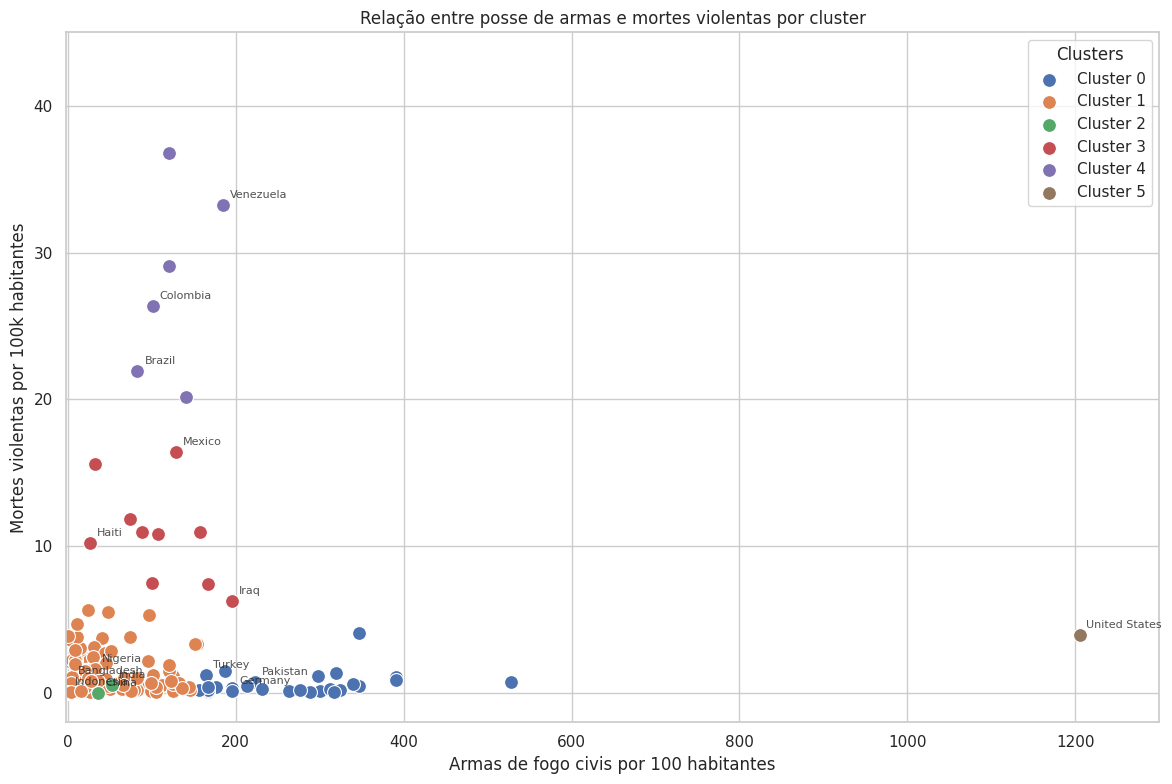

In [125]:
# Configurar o estilo do gráfico
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Criar o gráfico de dispersão
for i, cluster_df in cluster_dfs.items():
    sns.scatterplot(
        data=cluster_df,
        x='civilian_firearms_per_100',
        y='violent_deaths_per_100k',
        label=f'Cluster {i}',
        s=100  # Tamanho dos pontos
    )

# Adicionar rótulos para alguns países em cada cluster
for i, cluster_df in cluster_dfs.items():
    # Selecionar os 3 países com maior população em cada cluster
    top_3 = cluster_df.nlargest(3, 'pop')
    for idx, row in top_3.iterrows():
        plt.annotate(
            row['country'],
            (row['civilian_firearms_per_100'], row['violent_deaths_per_100k']),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=8,
            alpha=0.8
        )

# Configurar os rótulos e o título
plt.xlabel('Armas de fogo civis por 100 habitantes')
plt.ylabel('Mortes violentas por 100k habitantes')
plt.title('Relação entre posse de armas e mortes violentas por cluster')

# Ajustar a legenda
plt.legend(title='Clusters')

# Ajustar os limites dos eixos para melhor visualização
plt.xlim(-2, 1300)
plt.ylim(-2, 45)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### estudando as estatísticas descritivas de cada cluster:

In [126]:
# Imprimir estatísticas resumidas para cada cluster
for i, cluster_df in cluster_dfs.items():
    print(f"\nEstatísticas do Cluster {i}:")
    print(cluster_df[['violent_deaths_per_100k', 'civilian_firearms_per_100', 'pop']].describe())
    print("\nPaíses no cluster:")
    print(", ".join(cluster_df['country'].tolist()))


Estatísticas do Cluster 0:
       violent_deaths_per_100k  civilian_firearms_per_100           pop
count                29.000000                  29.000000  2.900000e+01
mean                  0.615517                 262.724138  2.447736e+07
std                   0.786101                  91.255879  4.811260e+07
min                   0.030000                 156.000000  9.181000e+03
25%                   0.200000                 176.000000  3.444263e+06
50%                   0.340000                 263.000000  6.605168e+06
75%                   0.770000                 319.000000  1.151600e+07
max                   4.070000                 528.000000  2.414994e+08

Países no cluster:
Austria, Bosnia and Herzegovina, Canada, Cyprus, Finland, France, Germany, Greece, Iceland, Jordan, Kuwait, Lebanon, Montenegro, New Zealand, North Macedonia, Norway, Oman, Pakistan, Portugal, Qatar, Saudi Arabia, Serbia, Slovenia, Sweden, Switzerland, Turkey, United Arab Emirates, Uruguay, Yemen

Estat

### Procurando o Brasil:

In [129]:
#vou escrever os dados do cluster 4
cluster_dfs[4]

,country,pop,violent_deaths_per_100k,civilian_firearms_per_100
18,Brazil,203080756.0,21.93,83.0
29,Colombia,52695952.0,26.36,101.0
40,El Salvador,6884888.0,36.78,120.0
53,Guatemala,17843132.0,29.06,121.0
58,Honduras,9892632.0,20.15,141.0
154,Venezuela,28302000.0,33.27,185.0


### Com base nesse modelo treinado, o Brasil possui semelhanças, no que se refere à questão, a países como Colômbia, El Salvador, Guatemala, Honduras e Vezenuela. Todos esses países passaram (a maioria ainda passa, com excessão de El Salvador que melhorou no quesito) por crises de segurança pública muito profundas.

### Mais para frente quero estudar características de países com grande população, mas segurança pública controlada. A ideia será gerar insights acerca do que o Brasil poderia implementar.